<div class="alert alert-block alert-info">
Notebook Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

In [1]:
import pandas as pd
import sqlite3 # https://docs.python.org/3/library/sqlite3.html
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import Image, display, HTML, clear_output
from ipywidgets import interact, interact_manual

# Structured Query Language (SQL)

[Structured Query Language (SQL)](https://en.wikipedia.org/wiki/SQL) domain-specific language used in programming and designed for managing data held in a relational database management system (RDBMS), or for stream processing in a relational data stream management system (RDSMS). It is particularly useful in handling structured data, i.e. data incorporating relations among entities and variables. Main advantages include introduction of the concept of accessing many records with one single command and eliminates the need to specify how to reach a record (e.g. with or without an index). SQL became a standard of the American National Standards Institute (ANSI) in 1986 and of the International Organization for Standardization (ISO) in 1987.[11] Since then, the standard has been revised to include a larger set of features. Despite the existence of standards, most SQL code requires at least some changes before being ported to different database systems.


There are various SQL RDMS including but not limited to  Microsoft SQL Server, Oracle, PostgreSQL, SQLite and MySQL. There are various SQL libraries in python that are compatible with different SQL RDMS.
- Postgre SQL Database Libraries: “psycopg2” or “pg8000”
- MySQL Database Libraries, “mysql-connector-python” or “oursql”
- Oracle SQL Database libraries: “cx-Oracle”
- Microsoft SQL Server and other database libraries: “pyodbc” or “pymssql”

Also, SQLAlchemy is a Python library that maps databases (e.g., tables, records)to python objects (e.g., dataframe).

References: <br>
- Comparison of database management systems:
    - https://wlogz.io/blog/relational-database-comparison/amp/
    - https://www.digitalocean.com/community/tutorials/sqlite-vs-mysql-vs-postgresql-a-comparison-of-relational-database-management-systems

- Code Examples: SQL Database reading to/from Python Pandas:
    - https://datatofish.com/pandas-dataframe-to-sql/
    - https://medium.com/@devartimahakalkar/connecting-sql-datasets-with-pandas-105f8eb68f1a
    - https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-pandas?view=sql-server-ver16
    - https://towardsdatascience.com/work-with-sql-in-python-using-sqlalchemy-and-pandas-cd7693def708
    - https://learn.microsoft.com/en-us/sql/machine-learning/data-exploration/python-dataframe-sql-server?view=sql-server-ver16

# Connecting to SQL database
Note that in this case we are using a sample database (.db) file in the output_data. Note that the database file was created using the Jupyter Notebook "1_SQL_DB_Test_File_Creation.ipynb" and combined various csv files from the airline industry data as tables within the database file. 

In [2]:
# Creates a connection to flights_database.db: https://docs.python.org/3/library/sqlite3.html#sqlite3.connect
conn = sqlite3.connect('./output_data/flights_database.db') 
# Direct connection to a database is possible with appropriate approval from database owner.
c = conn.cursor() # Creates cursor object: https://en.wikipedia.org/wiki/Cursor_(databases)

In [3]:
# Query name of tables
sql_query = "SELECT name FROM sqlite_master WHERE type='table';"
# Executes the query in the cursor object.
c.execute(sql_query);

In [4]:
c.fetchall() # List of tables in the SQL database.

[('flights',), ('airports',), ('airlines',)]

In [5]:
sql_query = "select * from flights" # Selects the flights table.
c.execute(sql_query);

In [6]:
# Prints description (i.e., column names) of the flights table.
print(list(map(lambda x: x[0], c.description))) 

['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']


In [7]:
# Same as above but using list comprehensions
print([description[0] for description in c.description])

['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']


In [8]:
sql_query = "select * from airports" # Selects the airports table.
c.execute(sql_query);

In [9]:
# List of the airports table column names.
print([description[0] for description in c.description])

['faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone']


# SQL Operations and Syntax
Performing queries in SQL uses its own syntax and various tutorials can be found online for performing learning SQL syntax. Operations include querying data, sorting data, filtering data, conditional expressions, joining multiple tables, aggregate functions, grouping, set operators, modifying tables, etc. See examples of SQL data selection in the next section.

References: <br>
- https://www.sqltutorial.org/
- https://www.w3schools.com/sql/sql_syntax.asp
- https://www.w3schools.com/sql/
- https://swcarpentry.github.io/sql-novice-survey/03-filter/

# Pandas Reading SQL
There are various functions that can be used to read SQL connection. This includes [pd.read_sql_query()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html), [pd.read_sql_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_table.html#pandas.read_sql_table) and [pd.read_sql()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html#pandas.read_sql). 

In [10]:
pd.read_sql_query("SELECT * FROM flights", conn) # Using Pandas to queary the SQL database. '*' selects all data in table.
# We can filter data using the SQL queary or use Pandas to filter the dataframe.
# For large SQL databases it may make sense to do a query in SQL first as it will load less data into Pandas.

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,361,2013,1,1,1315,-2,1413,-10,EV,N13538,4112,EWR,ALB,33,143,13,15
1,570,2013,1,1,1655,34,1804,40,EV,N19554,3260,EWR,ALB,36,143,16,55
2,785,2013,1,1,2056,52,2156,44,EV,N12540,4170,EWR,ALB,31,143,20,56
3,1280,2013,1,2,1332,5,1419,-14,EV,N14153,4316,EWR,ALB,33,143,13,32
4,1537,2013,1,2,1746,85,1835,71,EV,N14153,3260,EWR,ALB,31,143,17,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,111241,2013,12,31,2037,-3,2351,-8,B6,N768JB,523,JFK,LAX,354,2475,20,37
145731,111260,2013,12,31,2128,-7,101,6,AA,N332AA,185,JFK,LAX,360,2475,21,28
145732,111287,2013,12,31,NA,NA,NA,NA,UA,None,1455,EWR,LAX,NA,2454,NA,NA
145733,111290,2013,12,31,NA,NA,NA,NA,UA,None,1493,EWR,LAX,NA,2454,NA,NA


In [11]:
# Using the read_sql we can select specific columns.
pd.read_sql('SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights', conn)

,year,dep_delay,carrier,origin,dest,air_time,distance
0,2013,-2,EV,EWR,ALB,33,143
1,2013,34,EV,EWR,ALB,36,143
2,2013,52,EV,EWR,ALB,31,143
3,2013,5,EV,EWR,ALB,33,143
4,2013,85,EV,EWR,ALB,31,143
...,...,...,...,...,...,...,...
145730,2013,-3,B6,JFK,LAX,354,2475
145731,2013,-7,AA,JFK,LAX,360,2475
145732,2013,NA,UA,EWR,LAX,NA,2454
145733,2013,NA,UA,EWR,LAX,NA,2454


In [12]:
# This query selects the specified columns and filters for departure delay less than 5 and excludes values of "NA".
pd.read_sql('''SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights
WHERE dep_delay < 5 AND dep_delay NOT IN ("NA")''', conn)

,year,dep_delay,carrier,origin,dest,air_time,distance
0,2013,-2,EV,EWR,ALB,33,143
1,2013,34,EV,EWR,ALB,36,143
2,2013,104,EV,EWR,ALB,30,143
3,2013,-7,EV,EWR,ALB,37,143
4,2013,-1,EV,EWR,ALB,33,143
...,...,...,...,...,...,...,...
125921,2013,-10,AA,JFK,LAX,348,2475
125922,2013,0,UA,EWR,LAX,357,2454
125923,2013,-1,DL,JFK,LAX,347,2475
125924,2013,-3,B6,JFK,LAX,354,2475


In [13]:
# Let's say we want to focus an analysis on only late departure flights
# Where late flights is defined as those with departure delay of 5 minutes or more.
# This query selects the specified columns and filters for departure delay higher than 5 and excludes values of "NA".
# Lets also assign a dataframe name.
df_flights = pd.read_sql('''SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights
WHERE dep_delay >= 5 AND dep_delay NOT IN ("NA")''', conn)

print(df_flights.shape)
df_flights.head(5)

# Our dataframe is reduced from over 140K to just over 16K rows of data.

(16071, 7)


,year,dep_delay,carrier,origin,dest,air_time,distance
0,2013,52,EV,EWR,ALB,31,143
1,2013,5,EV,EWR,ALB,33,143
2,2013,85,EV,EWR,ALB,31,143
3,2013,57,EV,EWR,ALB,31,143
4,2013,96,EV,EWR,ALB,30,143


In [14]:
# We could have uploaded the full flights table (all 145,735 rows) in Pandas and then done the filtering in Pandas.
# But that would be unnecessary use of resources and in cases may not even load.
# In these cases you may need to do a filtering in SQL and then as needed do further filtering in Pandas.

In [15]:
# Now that we have extracted what we need we can close the connection to the database.
conn.close() 

In [16]:
# Once the connection is closed you will see that we cannot read the database.
pd.read_sql('''SELECT year, dep_delay, carrier, origin, dest, air_time, distance FROM flights
WHERE dep_delay >= 10 AND dep_delay NOT IN ("NA")''', conn)

ProgrammingError: Cannot operate on a closed database.

# Data Cleaning
In preparation for data analysis we need to make sure there are no issues with the data.

In [17]:
# Let's do a check on the data to make sure there are no issues.

In [18]:
df_flights.isna().sum() # No columns have NA's

year         0
dep_delay    0
carrier      0
origin       0
dest         0
air_time     0
distance     0
dtype: int64

In [19]:
df_flights.describe()
# Note this is only 2013 year.

,year,distance
count,16071.0,16071.000000
mean,2013.0,1017.952399
std,0.0,768.248053
min,2013.0,116.000000
25%,2013.0,301.000000
50%,2013.0,764.000000
75%,2013.0,1416.000000
max,2013.0,4983.000000


In [20]:
# We note that describe is only calculating the statistics for "year" and "distance" columns.
# This is probably because the other columns were detected as strings.
df_flights.info()
# Previous hypothesis seems correct.
# Carrier, Origin, and Destination should be objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       16071 non-null  int64 
 1   dep_delay  16071 non-null  object
 2   carrier    16071 non-null  object
 3   origin     16071 non-null  object
 4   dest       16071 non-null  object
 5   air_time   16071 non-null  object
 6   distance   16071 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 879.0+ KB


In [21]:
df_flights.describe(include='object')
# There seem to be 78 unique values.

,dep_delay,carrier,origin,dest,air_time
count,16071,16071,16071,16071,16071
unique,78,14,3,42,419
top,5,UA,EWR,ATL,42
freq,1886,3428,6581,1753,234


In [22]:
df_flights.dep_delay.value_counts(dropna = False) # ALl values seem to be numeric and no NA values as previously evaluated.
# We can probably tell Pandas to convert dep_delay and air_time columns to_numeric.

5      1886
6      1691
7      1565
8      1432
9      1341
       ... 
800       1
786       1
592       1
599       1
503       1
Name: dep_delay, Length: 78, dtype: int64

In [23]:
df_flights["dep_delay"] = pd.to_numeric(df_flights["dep_delay"])
df_flights["air_time"] = pd.to_numeric(df_flights["air_time"])
# There seems to be an error in the air_time where there is still a "NA" string.

ValueError: Unable to parse string "NA" at position 276

In [24]:
# COnverts to column to numeric and on error uses coerce which puts NaN or Null to those values and filter nulls out. 
df_flights = df_flights[pd.to_numeric(df_flights['dep_delay'], 
                                      errors='coerce').notnull()].reset_index(drop = True)
df_flights = df_flights[pd.to_numeric(df_flights['air_time'], 
                                      errors='coerce').notnull()].reset_index(drop = True)

In [25]:
df_flights.info()
# Still air_time is detected as an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15994 entries, 0 to 15993
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       15994 non-null  int64 
 1   dep_delay  15994 non-null  int64 
 2   carrier    15994 non-null  object
 3   origin     15994 non-null  object
 4   dest       15994 non-null  object
 5   air_time   15994 non-null  object
 6   distance   15994 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 874.8+ KB


In [26]:
df_flights['air_time'] = df_flights['air_time'].astype(int) # Lets change the data type to int.
df_flights.describe()

,year,dep_delay,air_time,distance
count,15994.0,15994.000000,15994.000000,15994.000000
mean,2013.0,39.740590,146.735651,1017.252595
std,0.0,41.473623,97.395371,767.791784
min,2013.0,5.000000,21.000000,116.000000
25%,2013.0,7.000000,59.000000,301.000000
50%,2013.0,50.000000,120.000000,764.000000
75%,2013.0,68.000000,206.000000,1416.000000
max,2013.0,898.000000,686.000000,4983.000000


# Data Analysis: Groupby

Groupby Function:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://sparkbyexamples.com/pandas/pandas-groupby-explained-with-examples/
- https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
- https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/

In [27]:
# Say we want to group the carrier and calculate the average departure delay.

In [28]:
# Mean for the dep_delay, 'air_time', and 'distance' grouped by carrier and sorted by dep_delay.
df_flights.groupby(by=["carrier"])[['dep_delay', 'air_time', 'distance']].mean().sort_values(by=['dep_delay'])
# If usefule, derive a feature of the ratio of the departure delay and air time or the departure delay and distance.
# Notes:
# US mean departure delay is almost the same as the mean airtime.
# YV mean departure delay is more than the mean air time.

,dep_delay,air_time,distance
carrier,,,
VX,23.358804,328.591362,2441.026578
HA,29.461538,623.076923,4983.000000
UA,29.772315,215.890255,1571.830553
WN,31.092767,187.500000,1298.272013
FL,37.293182,103.963636,686.511364
DL,38.457452,150.221840,1053.973438
B6,39.821554,137.706755,956.962905
US,41.275728,44.192233,204.038835
AA,43.057296,218.225604,1557.931961


In [29]:
# Mean for the dep_delay, 'air_time', and 'distance' grouped by carrier and sorted by dep_delay.
df_flights.groupby(by=['dest'])[['dep_delay', 
                                 'air_time', 
                                 'distance']].mean().sort_values(by=['dep_delay'], 
                                                                 ascending = False).head(20)
# If you are traveling to CAE is the worst destination.

,dep_delay,air_time,distance
dest,,,
CAE,68.444444,93.722222,605.333333
ILM,66.300000,73.600000,500.000000
DSM,61.014493,147.855072,1020.449275
BHM,57.942857,123.314286,865.971429
GSP,52.147287,95.015504,595.364341
ALB,51.957143,32.457143,143.000000
BGR,51.765957,53.978723,378.000000
GSO,51.349515,72.742718,450.359223
BWI,51.025253,38.823232,177.863636


In [30]:
# Mean for the dep_delay, 'air_time', and 'distance' grouped by carrier and sorted by dep_delay.
df_flights.groupby(by=['origin', 'dest'])[['dep_delay', 
                                           'air_time', 
                                           'distance']].mean().sort_values(by=['dep_delay'], 
                                                                 ascending = False).head(20)
# If you are traveling from EWR to JAC is the worst route.

dep_delay    air_time  distance
origin dest                                 
EWR    JAC   87.000000  255.000000    1874.0
LGA    CAE   72.500000   98.000000     617.0
EWR    CAE   67.285714   92.500000     602.0
LGA    ILM   66.300000   73.600000     500.0
EWR    DSM   63.000000  149.326923    1017.0
LGA    BHM   59.441176  123.500000     866.0
JFK    IAH   56.052632  201.789474    1417.0
LGA    BTV   55.048780   43.926829     258.0
       DSM   54.941176  143.352941    1031.0
       GSP   53.636364  100.272727     610.0
JFK    BWI   52.478632   39.854701     184.0
EWR    GSP   52.008475   94.525424     594.0
       ALB   51.957143   32.457143     143.0
LGA    BGR   51.765957   53.978723     378.0
EWR    GSO   51.729927   73.116788     445.0
       ATL   51.222857  112.657143     746.0
LGA    GSO   50.594203   72.000000     461.0
EWR    BDL   50.583333   25.366667     116.0
LGA    BUF   49.888889   48.777778     292.0
EWR    BTV   49.723077   46.238462     266.0

In [31]:
# Mean for the dep_delay, 'air_time', and 'distance' grouped by destination and carrier and sorted by dep_delay.
df_flights.groupby(by=['dest', 
                       'carrier'])[['dep_delay', 
                                    'air_time', 
                                    'distance']].mean().sort_values(by=['dep_delay'], ascending = False).head(20)
# The JAC with UA carrier has the worst departure delay

,,dep_delay,air_time,distance
dest,carrier,,,
JAC,UA,87.000000,255.000000,1874.000000
BWI,MQ,85.074074,41.555556,184.000000
LAS,AA,72.266667,305.750000,2248.000000
CAE,EV,68.444444,93.722222,605.333333
ILM,EV,66.300000,73.600000,500.000000
DSM,EV,63.098361,147.278689,1019.065574
ATL,9E,62.000000,106.000000,760.000000
IAD,YV,59.372093,48.906977,229.000000
BHM,EV,57.942857,123.314286,865.971429


In [32]:
# Mean for the dep_delay, 'air_time', and 'distance' grouped by carrier and destination and sorted by dep_delay.
df_flights.groupby(by=['carrier', 'dest'])[['dep_delay', 
                                            'air_time', 'distance']].mean().sort_values(by=['dep_delay']).head(20)
# Carrier First and Destination second seem to result in better groups.

dep_delay    air_time     distance
carrier dest                                    
DL      EYW    6.000000  192.000000  1207.000000
UA      HDN    6.500000  248.000000  1728.000000
9E      GRR    6.500000  102.000000   618.000000
DL      JAC    8.000000  270.000000  1894.000000
WN      BWI   18.928571   39.000000   169.000000
        ATL   20.000000  122.800000   762.000000
        AUS   20.681818  212.954545  1504.000000
VX      LAS   20.756757  304.081081  2248.000000
        LAX   23.723485  332.026515  2468.079545
UA      HNL   24.203125  609.687500  4963.000000
AA      FLL   24.733333  157.800000  1069.000000
UA      IAH   26.689616  197.452596  1405.778781
        LAS   26.732075  298.324528  2227.000000
        DEN   27.312625  224.675351  1610.470942
DL      LAS   27.516340  301.189542  2248.000000
UA      LAX   28.349338  326.647351  2460.849338
WN      BNA   28.875000  114.481250   758.500000
UA      ATL   29.400000  113.066667   746.000000
HA      HNL   29.461538  623.076923  4983.000000
UA      FLL   29.716867  152.292169  1065.000000

In [34]:
# Mean for the dep_delay, 'air_time', and 'distance' grouped by carrier and destination and sorted by dep_delay.
df_flights.groupby(by=['carrier',
                       'origin', 
                       'dest',])[['dep_delay', 
                                  'air_time', 
                                  'distance']].mean().sort_values(by=['dep_delay'], ascending = False).head(20)
# Carrier and Routes statistics.
# The derived feature may be interesting here as well with the ratio of dep_delay and air_time.

dep_delay    air_time  distance
carrier origin dest                                 
UA      EWR    JAC   87.000000  255.000000    1874.0
MQ      JFK    BWI   85.074074   41.555556     184.0
EV      LGA    CAE   72.500000   98.000000     617.0
AA      JFK    LAS   72.266667  305.750000    2248.0
EV      EWR    CAE   67.285714   92.500000     602.0
        LGA    ILM   66.300000   73.600000     500.0
               DSM   63.666667  135.444444    1031.0
               IND   63.000000  109.000000     660.0
        EWR    DSM   63.000000  149.326923    1017.0
9E      JFK    ATL   62.000000  106.000000     760.0
EV      LGA    BHM   59.441176  123.500000     866.0
YV      LGA    IAD   59.372093   48.906977     229.0
AA      JFK    IAH   56.052632  201.789474    1417.0
DL      EWR    ATL   55.378378  110.567568     746.0
EV      EWR    BWI   55.194030   36.985075     169.0
        LGA    BTV   55.048780   43.926829     258.0
9E      LGA    GSP   54.000000  100.700000     610.0
        JFK    JAX   52.584906  117.547170     828.0
        LGA    BUF   52.166667   49.166667     292.0
EV      EWR    GSP   52.008475   94.525424     594.0

In [35]:
df_flights.groupby(['carrier']).agg({'dep_delay': ['count', 'sum', 'mean', 'min', 'max']})
# Could aggregate by various statitstics.

dep_delay                            
            count     sum       mean min  max
carrier                                      
9E            828   36099  43.597826   5   99
AA           1117   48095  43.057296   5  853
B6           2561  101983  39.821554   5   99
DL           2033   78184  38.457452   5  898
EV           3123  153599  49.183157   5  536
F9             97    4489  46.278351   5  853
FL            440   16409  37.293182   5  602
HA             13     383  29.461538   5   88
MQ            870   44022  50.600000   5  853
UA           3417  101732  29.772315   5   99
US            515   21257  41.275728   5   99
VX            301    7031  23.358804   5   99
WN            636   19775  31.092767   5   99
YV             43    2553  59.372093   5   97

In [36]:
# Both carrier and destination.
df_flights.groupby(['carrier', 'dest']).agg({'dep_delay': ['count', 'sum', 'mean', 'min', 'max']})

dep_delay                         
                 count   sum       mean min max
carrier dest                                   
9E      ATL          1    62  62.000000  62  62
        BNA         79  2672  33.822785   5  90
        BOS         95  4150  43.684211   5  99
        BUF         85  4098  48.211765   5  98
        BWI         90  3843  42.700000   5  99
...                ...   ...        ...  ..  ..
WN      BNA        160  4620  28.875000   5  99
        BWI         14   265  18.928571   5  74
        DEN        253  8198  32.403162   5  99
        HOU        182  6137  33.719780   5  98
YV      IAD         43  2553  59.372093   5  97

[106 rows x 5 columns]

In [37]:
df_grouped = df_flights.groupby(by=['carrier',
                       'origin', 
                       'dest']).agg({'carrier': ['count'],
                                     'dep_delay': ['sum', 'mean', 
                                                   'min', 'max'],
                                     'air_time': ['sum', 'mean', 
                                                  'min', 'max']}).sort_values(by=[('dep_delay', 
                                                                                   'mean')], ascending = False).reset_index()
# Carrier route all statistics together.
# Note that the resulting table is a multiindex on both the rows and the columns.
# Note that the sorting here is a multi index sort by one column.
# Count will be the same for carrier, dest, dep_delay and air_time. Did the count per carrier instead as is the first level.
# The derived feature may be interesting here as well with the ratio of dep_delay and air_time.

In [38]:
df_grouped

carrier origin dest carrier dep_delay                     air_time  \
                          count       sum       mean min  max      sum   
0        UA    EWR  JAC       1        87  87.000000  87   87      255   
1        MQ    JFK  BWI      27      2297  85.074074   5  853     1122   
2        EV    LGA  CAE       4       290  72.500000  62   88      392   
3        AA    JFK  LAS      60      4336  72.266667   5  853    18345   
4        EV    EWR  CAE      14       942  67.285714  51   96     1295   
..      ...    ...  ...     ...       ...        ...  ..  ...      ...   
140      DL    JFK  JAC       1         8   8.000000   8    8      270   
141      EV    JFK  BHM       1         7   7.000000   7    7      117   
142      9E    LGA  GRR       2        13   6.500000   6    7      204   
143      UA    EWR  HDN       2        13   6.500000   5    8      496   
144      DL    LGA  EYW       1         6   6.000000   6    6      192   

                           
           mean  min  max  
0    255.000000  255  255  
1     41.555556   35   57  
2     98.000000   91  108  
3    305.750000  271  342  
4     92.500000   79  116  
..          ...  ...  ...  
140  270.000000  270  270  
141  117.000000  117  117  
142  102.000000   99  105  
143  248.000000  246  250  
144  192.000000  192  192  

[145 rows x 12 columns]

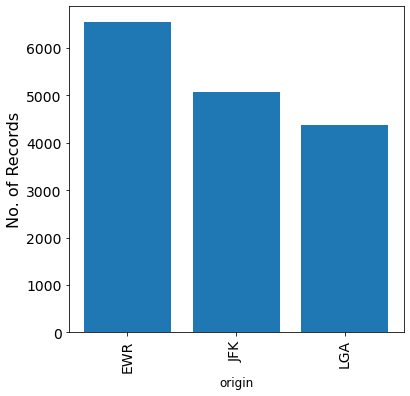

In [39]:
x_feature = 'origin' # Categorical features: carrier, origin or dest
# Value counts of the categorical features.
df_feature_counts = df_flights[x_feature].value_counts().rename_axis(x_feature).reset_index(name='counts')
fig_width = max(6, min(int(len(df_feature_counts[x_feature].unique())),14)) # Minimum of 6 and max of 12.
# Bar Plot
plt.figure(figsize=(fig_width,6))
plt.bar(x = df_feature_counts[x_feature], height = df_feature_counts['counts'])
plt.xlabel(f'{x_feature}', fontsize=12)
plt.xticks(ticks = df_feature_counts[x_feature].unique(), rotation = 90, size = 14)
plt.ylabel("No. of Records", fontsize=16)
plt.yticks(size = 14)
plt.ylim(bottom = 0)
plt.show();

In [40]:
df_feature_counts

,origin,counts
0,EWR,6548
1,JFK,5068
2,LGA,4378


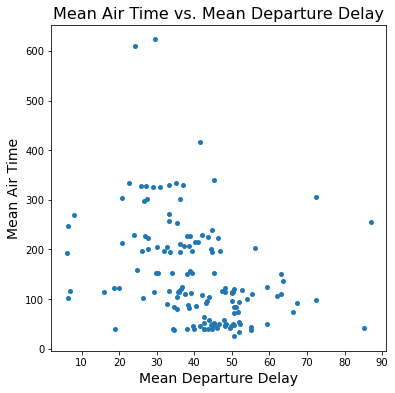

In [41]:
# Scatter Plot of Air time and Departure delay.
display(HTML(f'<h3>Mean Air Time vs. Mean Departure Delay<h3>'))
plt.figure(figsize=(6,6))
plt.scatter(df_grouped['dep_delay', 'mean'], df_grouped['air_time', 'mean'], 
            marker='.', s=100, lw=0, alpha=1, c=None, edgecolor=None)
plt.title(label = f"Mean Air Time vs. Mean Departure Delay", size = 16)
plt.xlabel('Mean Departure Delay', size=14)
plt.ylabel('Mean Air Time', size=14)
plt.show();

# Python Dashboards
Python has various libraries that allow for data dashboards. In this notebook, a dashboard is developed using [Jupyter Notebook Widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html). Python has various other libraries used for developing dashboards. These include Anaconda Panel, Plotly Dash, Streamlit, Voila among others. Amazon Web Services, MS Azure, Google Cloud Platform, Microstrategy, Palantir Foundry, Tableau are other commercially available platforms that have their own platforms, frameworks and libraries that also allow for developing data analysis dashboard like applications.   

Jupyter Notebook Widgets have one advantage in that they can be quickly developed in a Jupyter Notebook and allows a data scientist to develop a concept and explore potential capabilities of a dashboard while also allowing to identify early limitations of the data and the tools without spending the resources in developing a webbased dashboard. However, the main disadvantage of Jupyter Notebook Widgets is that they cannot be deployed in a Website framework or an application easily and will need to be moved to another platform if the stakeholder decides to proceed. The other libraries above all have different advanatages and limitations and would need to be evaluated separately depending on the needs of the stakeholders and the organization.   

References: <br>
- Jupyter Notebook Widgets: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
- https://medium.com/spatial-data-science/the-best-tools-for-dashboarding-in-python-b22975cb4b83

#### Geospatial  Analysis and Spatial Visualization
Could use the data above along with the data of the airport locations (e.g., longitude and latitude) to create a visualizationof a map a network of the routes and delays. See the examples below which attempt to do something similar.

References: <br>
- https://www.kaggle.com/code/mbggbm/flight-routes-spatial-visualization-with-plotly/notebook
- https://coderzcolumn.com/tutorials/data-science/how-to-create-connection-map-chart-in-python-jupyter-notebook-plotly-and-geopandas
- https://ipython-books.github.io/142-drawing-flight-routes-with-networkx/

#### Bubble Plot
Could be interesting to do a [bubble plot](https://www.python-graph-gallery.com/bubble-plot/) visualization of dep_delay vs. air_time.

References: <br>
- https://www.python-graph-gallery.com/341-python-gapminder-animation

In [42]:
# List of Unique Carriers, Origin and Destination to be used as options in the dashboard.
carrier_list = sorted([x for x in df_flights['carrier'].unique()])
origin_list = sorted([x for x in df_flights['origin'].unique()])
dest_list = sorted([x for x in df_flights['dest'].unique()])

In [43]:
# PRIMARY WIDGET DATA FUNCTION
def filter_data(carrier_filter, origin_filter, dest_filter, dep_delay_filter, air_time_filter):
    
    global df_filtered, df_grouped
    pd.set_option('display.max_columns', None)
    
    # Filtering Data
    df_filtered = df_flights.loc[(df_flights['carrier'].isin(carrier_filter)) &
                                 (df_flights['origin'].isin(origin_filter)) &
                                 (df_flights['dest'].isin(dest_filter)) &
                                 (df_flights['dep_delay'] >= min(dep_delay_filter)) &
                                 (df_flights['dep_delay'] <= max(dep_delay_filter)) & 
                                 (df_flights['air_time'] >= min(air_time_filter)) &
                                 (df_flights['air_time'] <= max(air_time_filter))
                                ].copy().reset_index(drop = True)
    
    df_grouped = df_filtered.groupby(by=['carrier',
                                         'origin', 
                                         'dest']).agg({'carrier': ['count'],
                                                       'dep_delay': ['sum', 'mean', 
                                                                     'min', 'max'],
                                                       'air_time': ['sum', 'mean', 
                                                                    'min', 'max']}).reset_index()

    # TABS
    val_counts_tab = widgets.Output()
    grouped_tab = widgets.Output()
    
    # TABS PROPERTIES
    tab = widgets.Tab(children = [val_counts_tab, grouped_tab])
    tab.set_title(0, 'Plots')
    tab.set_title(1, 'Grouped Data')

    display(tab)
    
    # TABS INFORMATION AND WIDGET AND FUNCTION CALLING
    with val_counts_tab:
        display(HTML(f'<h3>Value counts of Categorical Features<h3>'))
        val_counts_widget()

    with grouped_tab:
        display(HTML(f'<h3>Statistics of Grouped Data<h3>'))
        print('This tab groups data and calculates the mean, min, max statistics, shows the scatter plot of the mean air time and departure delay and shows the dataframe.')
        grouped_widget()

In [44]:
def val_counts_widget():
    interact(val_counts,
             x_feature = widgets.Dropdown(options = ['carrier', 'origin', 'dest'],
                                          value = 'carrier',   
                                          description = 'Plot X-Axis',
                                          style={'description_width': 'initial'},
                                          disabled = False),
             y_feature = widgets.Dropdown(options = ['counts', 'air_time', 'dep_delay'],
                                          value = 'counts',   
                                          description = 'Plot Y-Axis',
                                          style={'description_width': 'initial'},
                                          disabled = False),
             statistic = widgets.Dropdown(options = ['sum', 'mean', 'min', 'max'],
                                          value = 'mean',   
                                          description = 'Plot Statistic',
                                          style={'description_width': 'initial'},
                                          disabled = False)
            )

In [45]:
def val_counts(x_feature, y_feature, statistic):
    # Plot for record counts or statistics vs. categorical feature.
    if y_feature == 'counts':
        # Value counts of the categorical features.
        df_feature_counts = df_filtered[x_feature].value_counts().rename_axis(x_feature).reset_index(name='counts')
        fig_width = max(6, min(int(len(df_feature_counts[x_feature].unique())),14)) # Minimum of 6 and max of 14.
        plt.figure(figsize=(fig_width,6))
        plt.bar(x = df_feature_counts[x_feature], height = df_feature_counts['counts'])

    else:
        df_grouped_sorted = df_grouped.sort_values(by=[(y_feature, statistic)], ascending = False).reset_index()
        fig_width = max(6, min(int(len(df_grouped_sorted[x_feature])),14)) # Minimum of 6 and max of 14.
        plt.figure(figsize=(fig_width,6))
        plt.bar(x = df_grouped_sorted[x_feature, ''], 
                height = df_grouped_sorted[y_feature, statistic])

    plt.xlabel(f'{x_feature}', fontsize=12)
    plt.ylabel(f'{y_feature} {statistic}', fontsize=12)
    plt.yticks(size = 14)
    plt.ylim(bottom = 0)
    plt.show();

In [46]:
def grouped_widget():
    interact_manual(grouped,
             y_feature = widgets.Dropdown(options = ['none', 'air_time', 'dep_delay'],
                                          value = 'dep_delay',   
                                          description = 'Sort by:',
                                          style={'description_width': 'initial'},
                                          disabled = False),
             statistic = widgets.Dropdown(options = ['sum', 'mean', 'min', 'max'],
                                          value = 'mean',   
                                          description = 'Sort Statistic',
                                          style={'description_width': 'initial'},
                                          disabled = False)
            )

In [47]:
def grouped(y_feature, statistic):
    # Scatter Plot of Air time and Departure delay.
    plt.figure(figsize=(6,6))
    plt.scatter(df_grouped['dep_delay', 'mean'], df_grouped['air_time', 'mean'], 
                marker='.', s=100, lw=0, alpha=1, c=None, edgecolor=None)
    plt.title(label = f"Mean Air Time vs. Mean Departure Delay", size = 16)
    plt.xlabel('Mean Departure Delay', size=14)
    plt.ylabel('Mean Air Time', size=14)
    plt.show();
    
    if y_feature == 'none':
        df_grouped_sorted = df_grouped
    else:
        df_grouped_sorted = df_grouped.sort_values(by=[(y_feature, statistic)], ascending = False).reset_index()
    
    # Displays the dataframe.
    display(HTML(df_grouped_sorted.to_html(index=False)))

In [50]:
# PRIMARY WIDGET FILTER OPTIONS
display(HTML(f'<h3>MAIN FILTER WIDGET<h3>'))
print("NOTE: Caution when selecting filters. Some filters may have overlaps (e.g., FY and CY) while other filters be mutually exclusive.")

_ = interact_manual(filter_data, # "filter_data" function filters the data and calls sub-widgest and related functions.
                    carrier_filter = widgets.SelectMultiple(options= carrier_list,
                                                             value = carrier_list,
                                                             rows = 6,
                                                             description = 'Carrier', 
                                                             disabled=False, style={'description_width': 'initial'}),
                    origin_filter = widgets.SelectMultiple(options= origin_list,
                                                             value = origin_list,
                                                             rows = 6,
                                                             description = 'Origin', 
                                                             disabled=False, style={'description_width': 'initial'}),
                    dest_filter = widgets.SelectMultiple(options= dest_list,
                                                             value = dest_list,
                                                             rows = 6,
                                                             description = 'Destination', 
                                                             disabled=False, style={'description_width': 'initial'}),
                    dep_delay_filter = widgets.IntRangeSlider(value = [df_flights['dep_delay'].min(),
                                                                       df_flights['dep_delay'].max()],
                                                              min = df_flights['dep_delay'].min(),
                                                              max = df_flights['dep_delay'].max(),
                                                              step = 1,
                                                              description = 'Departure Delay',
                                                              disabled = False,
                                                              orientation = 'horizontal',
                                                              readout = True,
                                                              readout_format = 'd',
                                                              style = {'description_width':'initial'},
                                                              layout = widgets.Layout(width = '50%')),
                    air_time_filter = widgets.IntRangeSlider(value = [df_flights['air_time'].min(),
                                                                      df_flights['air_time'].max()],
                                                             min = df_flights['air_time'].min(),
                                                             max = df_flights['air_time'].max(),
                                                             step = 1,
                                                             description = 'Air Time',
                                                             disabled = False,
                                                             orientation = 'horizontal',
                                                             readout = True,
                                                             readout_format = 'd',
                                                             style = {'description_width':'initial'},
                                                             layout = widgets.Layout(width = '50%')),
                    )

NOTE: Caution when selecting filters. Some filters may have overlaps (e.g., FY and CY) while other filters be mutually exclusive.


interactive(children=(SelectMultiple(description='Carrier', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

# NOTEBOOK END